# Hierarchical agglomerative fragrance clustering

# Project structure

1. Data preparation
2. Dendrograms
3. Hierarchical clustering
4. Cluster description by top accords
5. Most popular fragrances <br>
    5.1. Most popular fragrances by cluster <br>
    5.2. Most popular fragrances by brand 

## 1. Data preparation

In [1]:
# import Python libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster import hierarchy

In [2]:
# read csv with 39.7K female fragrances
df = pd.read_csv('result.csv')
df = df[['brand', 'title', 'date', 'rating_score', 'votes', 'accords_']]
df.head()

,brand,title,date,rating_score,votes,accords_
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,5.0,3,"woody,earthy,animalic,amber,musky"
1,Ajmal,Aatifa Ajmal for women and men,2014,4.2,10,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,0.0,0,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,0.0,1,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,0.0,2,"woody,warm spicy,amber,balsamic,musky"


In [3]:
# check for null values
df.isnull().sum()

brand             0
title             0
date              0
rating_score      0
votes             0
accords_        660
dtype: int64

In [4]:
# drop null values
df = df.dropna()
df.isnull().sum()

brand           0
title           0
date            0
rating_score    0
votes           0
accords_        0
dtype: int64

In [5]:
# check the contents of the accords_ column
df.groupby('accords_').count().head(20)

,brand,title,date,rating_score,votes
accords_,,,,,
Pictures,271,271,271,271,271
Videos,1,1,1,1,1
"Videos,Pictures",3,3,3,3,3
"aldehydic,amber,balsamic,rose,smoky",1,1,1,1,1
"aldehydic,amber,citrus,floral,musky",1,1,1,1,1
"aldehydic,amber,woody,balsamic,smoky",1,1,1,1,1
"aldehydic,aromatic,woody,floral,green",1,1,1,1,1
"aldehydic,balsamic,citrus,leather,sweet",1,1,1,1,1
"aldehydic,balsamic,musky,white floral,amber",1,1,1,1,1


In [6]:
# clean up by deleting rows with accords_ column equal to 'Pictures','Videos' or 'Videos, Pictures'
df = df.drop(df[(df['accords_'] == 'Pictures') | (df['accords_'] == 'Videos') | (df['accords_'] == 'Videos,Pictures')].index)

In [7]:
# once again, check the contents of the accords_ column
df.groupby('accords_').count().head(20)

,brand,title,date,rating_score,votes
accords_,,,,,
"aldehydic,amber,balsamic,rose,smoky",1,1,1,1,1
"aldehydic,amber,citrus,floral,musky",1,1,1,1,1
"aldehydic,amber,woody,balsamic,smoky",1,1,1,1,1
"aldehydic,aromatic,woody,floral,green",1,1,1,1,1
"aldehydic,balsamic,citrus,leather,sweet",1,1,1,1,1
"aldehydic,balsamic,musky,white floral,amber",1,1,1,1,1
"aldehydic,balsamic,white floral,citrus,woody",1,1,1,1,1
"aldehydic,citrus,alcohol,Champagne,fruity",3,3,3,3,3
"aldehydic,citrus,amber,musky,woody",1,1,1,1,1


## 2. Dendrograms

In [8]:
# vectorize the text - convert the string to numeric
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['accords_'].values.astype('U'))

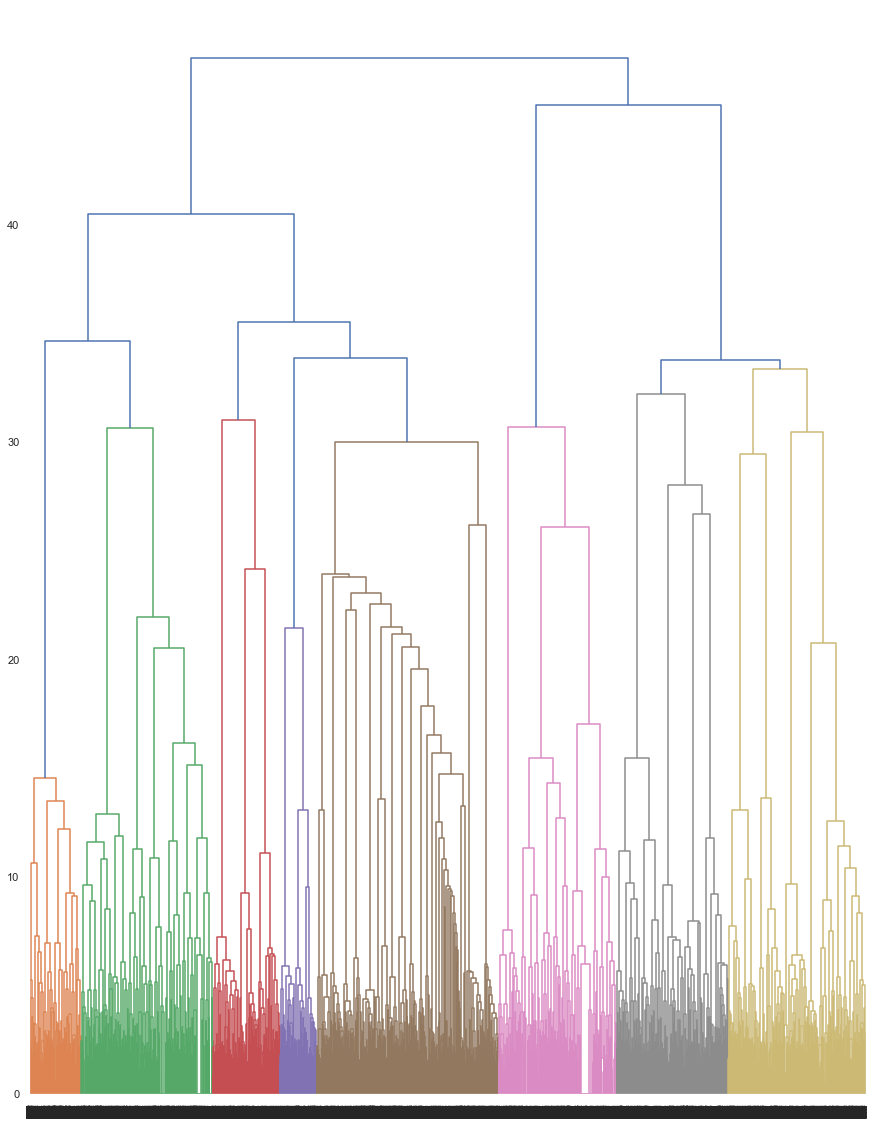

In [9]:
# create a dendrogram to find the optimal numbers of clusters
fig, ax = plt.subplots(figsize=(15, 20)) 
dend = hierarchy.dendrogram(hierarchy.linkage(X.todense(), method='ward')
                           )

fig.savefig('clusters_v0.png', dpi=300)

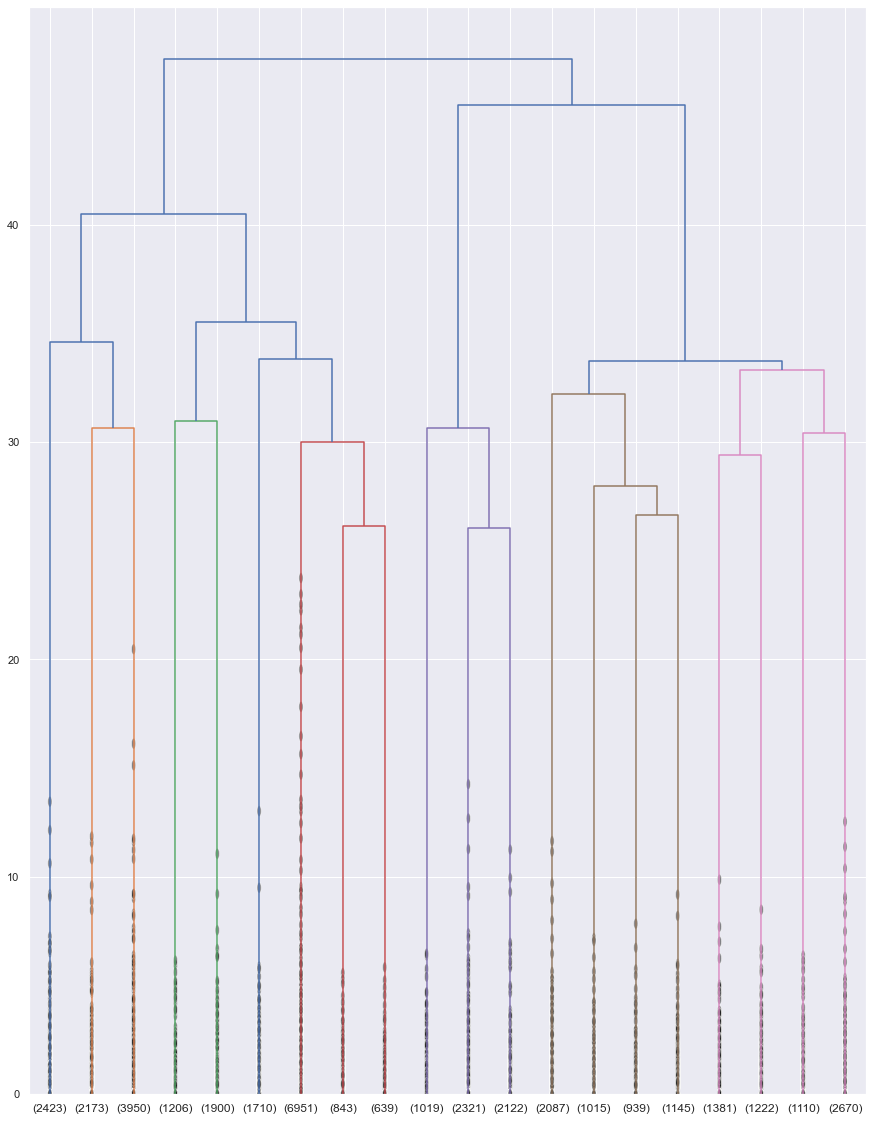

In [10]:
# create a more readable dendrogram
# (1) determine the largest vertical distance that doesn’t intersect any of the other clusters
# (2) the optimal number of clusters is equal to the number of vertical lines going through the horizontal line
# (3) the best choice for the number of clusters will be 20
fig, ax = plt.subplots(figsize=(15, 20)) 
dend2 = hierarchy.dendrogram(hierarchy.linkage(X.todense(), method='ward'),
                             truncate_mode='lastp',
                             p=20,
                             show_contracted=True,
                           )

fig.savefig('clusters_v1.png', dpi=300)

## 3. Hierarchical clustering

In [11]:
# hierarchical clustering model
from sklearn.cluster import (
AgglomerativeClustering,
)
ag = AgglomerativeClustering(
n_clusters=20,
affinity='euclidean',
linkage='ward',
)

In [12]:
df['aggclust_label'] = ag.fit_predict(X.todense())
df.head()

,brand,title,date,rating_score,votes,accords_,aggclust_label
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,5.0,3,"woody,earthy,animalic,amber,musky",8
1,Ajmal,Aatifa Ajmal for women and men,2014,4.2,10,"fresh spicy,woody,musky,rose,amber",9
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,0.0,0,"rose,woody,musky,oud,fruity",16
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,0.0,1,"white floral,green,ozonic,fresh,animalic",6
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,0.0,2,"woody,warm spicy,amber,balsamic,musky",9


In [13]:
# most frequent accords
df['accords_'].str.split(',', expand=True).stack().value_counts().head(20)

woody           19004
floral          15564
citrus          13892
sweet           12872
white floral    10888
fruity          10357
powdery          9006
aromatic         8667
fresh spicy      8528
balsamic         7972
green            7886
musky            7319
warm spicy       7111
rose             6255
vanilla          5957
amber            4764
fresh            4757
patchouli        2583
animalic         2510
earthy           1669
dtype: int64

In [14]:
word_frequencies_by_cluster = df[['accords_','aggclust_label']].groupby('aggclust_label').sum()

In [15]:
# create a loop for information about the characteristics of each cluster
for i in range(0,20):
    print(word_frequencies_by_cluster.loc[i, :].sort_values(ascending=False))

accords_    white floral,fruity,sweet,soft spicy,tuberosew...
Name: 0, dtype: object
accords_    fruity,sweet,woody,floral,citrusfruity,sweet,w...
Name: 1, dtype: object
accords_    fruity,sweet,vanilla,almond,balsamicsweet,frui...
Name: 2, dtype: object
accords_    woody,balsamic,aromatic,warm spicy,fresh spicy...
Name: 3, dtype: object
accords_    fruity,sweetsweet,citrus,fruity,musky,greengre...
Name: 4, dtype: object
accords_    fruity,rose,sweet,citrus,white floralfruity,sw...
Name: 5, dtype: object
accords_    white floral,green,ozonic,fresh,animalicwoody,...
Name: 6, dtype: object
accords_    fruity,sweet,white floral,patchouli,citrusfrui...
Name: 7, dtype: object
accords_    woody,earthy,animalic,amber,muskyfruity,patcho...
Name: 8, dtype: object
accords_    fresh spicy,woody,musky,rose,amberwoody,warm s...
Name: 9, dtype: object
accords_    fruity,woody,sweet,balsamic,yellow floralfruit...
Name: 10, dtype: object
accords_    herbal,aromatic,musky,fresh spicy,warm spicyea...
Na

In [16]:
word_frequencies_by_cluster

,accords_
aggclust_label,
0,"white floral,fruity,sweet,soft spicy,tuberosew..."
1,"fruity,sweet,woody,floral,citrusfruity,sweet,w..."
2,"fruity,sweet,vanilla,almond,balsamicsweet,frui..."
3,"woody,balsamic,aromatic,warm spicy,fresh spicy..."
4,"fruity,sweetsweet,citrus,fruity,musky,greengre..."
5,"fruity,rose,sweet,citrus,white floralfruity,sw..."
6,"white floral,green,ozonic,fresh,animalicwoody,..."
7,"fruity,sweet,white floral,patchouli,citrusfrui..."
8,"woody,earthy,animalic,amber,muskyfruity,patcho..."


## 4. Cluster description by top accords

In [17]:
# show top accords per cluster
cl0 = word_frequencies_by_cluster.loc[0]
cl0.str.split(',', expand=True).stack().value_counts().head()

animalic        856
tuberose        631
woody           455
white floral    428
amber           355
dtype: int64

In [18]:
cl1 = word_frequencies_by_cluster.loc[1]
cl1.str.split(',', expand=True).stack().value_counts().head()

woody      1621
floral     1479
powdery    1275
fruity     1248
sweet      1211
dtype: int64

In [19]:
cl2 = word_frequencies_by_cluster.loc[2]
cl2.str.split(',', expand=True).stack().value_counts().head()

sweet     2140
woody     1308
floral    1047
fruity     975
citrus     956
dtype: int64

In [20]:
cl3 = word_frequencies_by_cluster.loc[3]
cl3.str.split(',', expand=True).stack().value_counts().head()

warm spicy     1464
woody           897
balsamic        691
aromatic        572
fresh spicy     527
dtype: int64

In [21]:
cl4 = word_frequencies_by_cluster.loc[4]
cl4.str.split(',', expand=True).stack().value_counts().head()

green           1381
woody            819
floral           660
white floral     653
citrus           642
dtype: int64

In [22]:
cl5 = word_frequencies_by_cluster.loc[5]
cl5.str.split(',', expand=True).stack().value_counts().head()

rose      1406
floral     875
woody      741
citrus     567
fruity     512
dtype: int64

In [23]:
cl6 = word_frequencies_by_cluster.loc[6]
cl6.str.split(',', expand=True).stack().value_counts().head()

aquatic    779
ozonic     609
fresh      522
floral     469
fruity     365
dtype: int64

In [24]:
cl7 = word_frequencies_by_cluster.loc[7]
cl7.str.split(',', expand=True).stack().value_counts().head()

patchouli     917
woody         298
warm spicy    268
balsamic      267
citrus        256
dtype: int64

In [25]:
cl8 = word_frequencies_by_cluster.loc[8]
cl8.str.split(',', expand=True).stack().value_counts().head()

earthy        696
aromatic      390
woody         387
green         285
warm spicy    253
dtype: int64

In [26]:
cl9 = word_frequencies_by_cluster.loc[9]
cl9.str.split(',', expand=True).stack().value_counts().head()

amber       1274
woody        643
balsamic     424
floral       416
musky        408
dtype: int64

In [27]:
cl10 = word_frequencies_by_cluster.loc[10]
cl10.str.split(',', expand=True).stack().value_counts().head()

yellow floral    775
sweet            433
woody            373
floral           294
white floral     241
dtype: int64

In [28]:
cl11 = word_frequencies_by_cluster.loc[11]
cl11.str.split(',', expand=True).stack().value_counts().head()

herbal         596
fresh spicy    486
aromatic       366
woody          275
floral         253
dtype: int64

In [29]:
cl12 = word_frequencies_by_cluster.loc[12]
cl12.str.split(',', expand=True).stack().value_counts().head()

vanilla    1349
powdery     688
sweet       608
floral      574
woody       566
dtype: int64

In [30]:
cl13 = word_frequencies_by_cluster.loc[13]
cl13.str.split(',', expand=True).stack().value_counts().head()

soft spicy    637
sweet         286
floral        244
powdery       237
woody         228
dtype: int64

In [31]:
cl14 = word_frequencies_by_cluster.loc[14]
cl14.str.split(',', expand=True).stack().value_counts().head()

fresh spicy    1341
aromatic       1072
woody           849
citrus          692
green           618
dtype: int64

In [32]:
cl15 = word_frequencies_by_cluster.loc[15]
cl15.str.split(',', expand=True).stack().value_counts().head()

leather       700
woody         325
warm spicy    232
animalic      231
smoky         201
dtype: int64

In [33]:
cl16 = word_frequencies_by_cluster.loc[16]
cl16.str.split(',', expand=True).stack().value_counts().head()

oud            561
balsamic       291
fresh spicy    274
woody          269
rose           234
dtype: int64

In [34]:
cl17 = word_frequencies_by_cluster.loc[17]
cl17.str.split(',', expand=True).stack().value_counts().head()

smoky         646
balsamic      374
woody         328
warm spicy    268
amber         157
dtype: int64

In [35]:
cl18 = word_frequencies_by_cluster.loc[18]
cl18.str.split(',', expand=True).stack().value_counts().head()

tropical    546
fruity      402
sweet       382
floral      212
fresh       171
dtype: int64

In [36]:
cl19 = word_frequencies_by_cluster.loc[19]
cl19.str.split(',', expand=True).stack().value_counts().head()

sweet         453
sour          278
fruity        225
sourfruity    201
floral        146
dtype: int64

In [37]:
# ordinal features mapping
cluster_mapping = {
    0: 'Animalic Tuberose',
    1: 'Woody Floral Powdery',
    2: 'Sweet Woody',
    3: 'Warm Spicy',
    4: 'Green',
    5: 'Rose',
    6: 'Aquatic Ozonic',
    7: 'Patchouli',
    8: 'Earthy',
    9: 'Amber',
    10: 'Yellow Floral',
    11: 'Herbal',
    12: 'Vanilla Powdery',
    13: 'Soft Spicy',
    14: 'Fresh Spicy',
    15: 'Leather',
    16: 'Oud',
    17: 'Smoky',
    18: 'Tropical Fruity',
    19: 'Sweet Sour Fruity'}

df['aggclust_name'] = df['aggclust_label'].map(cluster_mapping)
df.head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,5.00,3,"woody,earthy,animalic,amber,musky",8,Earthy
1,Ajmal,Aatifa Ajmal for women and men,2014,4.20,10,"fresh spicy,woody,musky,rose,amber",9,Amber
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,0.00,0,"rose,woody,musky,oud,fruity",16,Oud
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,0.00,1,"white floral,green,ozonic,fresh,animalic",6,Aquatic Ozonic
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,0.00,2,"woody,warm spicy,amber,balsamic,musky",9,Amber
5,Xyrena,Aaliyah Xyrena for women and men,2015,4.17,10,"powdery,fresh spicy,aromatic,woody,leather",15,Leather
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,4.75,4,"white floral,rose,oud,soft spicy,fresh spicy",13,Soft Spicy
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,3.83,14,"woody,aromatic,fresh spicy,green,fresh",14,Fresh Spicy
8,Blackbird,Targa Blackbird for women and men,2015,4.10,22,"balsamic,woody,smoky,fresh spicy,warm spicy",17,Smoky
9,Blackbird,Broken Glass Blackbird for women and men,2015,3.71,18,"herbal,aromatic,musky,fresh spicy,warm spicy",11,Herbal


In [38]:
# clusters by size
df['aggclust_name'].value_counts()

Sweet Woody             6951
Woody Floral Powdery    3950
Warm Spicy              2670
Rose                    2423
Green                   2321
Vanilla Powdery         2173
Fresh Spicy             2122
Amber                   2087
Animalic Tuberose       1900
Aquatic Ozonic          1710
Patchouli               1381
Earthy                  1222
Yellow Floral           1206
Leather                 1145
Soft Spicy              1110
Herbal                  1019
Oud                     1015
Smoky                    939
Tropical Fruity          843
Sweet Sour Fruity        639
Name: aggclust_name, dtype: int64

In [39]:
# save end results to a csv file
df.to_csv('hierarchical_result.csv')

## 5. Most popular fragrances

In [40]:
# display fifteen most popular fragrances
popular = df.sort_values('votes', ascending=False).head(15)
popular

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
7958,Mugler,Angel Mugler for women,1992,3.15,11188,"sweet,patchouli,warm spicy,fruity,caramel",2,Sweet Woody
6615,Mugler,Alien Mugler for women,2005,3.81,10435,"white floral,amber,woody,animalic,balsamic",0,Animalic Tuberose
20480,Chanel,Coco Mademoiselle Chanel for women,2001,4.08,10349,"citrus,patchouli,white floral,sweet,rose",7,Patchouli
15892,Dolce-Gabbana,Light Blue Dolce&Gabbana for women,2001,3.64,10008,"citrus,woody,green,fresh,fruity",4,Green
33836,Christian-Dior,Hypnotic Poison Christian Dior for women,1998,3.95,9771,"vanilla,almond,sweet,nutty,fruity",2,Sweet Woody
2565,Christian-Dior,J'adore Christian Dior for women,1999,3.64,8689,"floral,fruity,white floral,sweet,aquatic",6,Aquatic Ozonic
4074,Viktor-Rolf,Flowerbomb Viktor&Rolf for women,2005,3.72,8573,"floral,patchouli,white floral,green,citrus",7,Patchouli
29052,Calvin-Klein,Euphoria Calvin Klein for women,2005,3.68,8161,"woody,floral,powdery,sweet,amber",9,Amber
12066,Tom-Ford,Black Orchid Tom Ford for women,1,3.77,8128,"warm spicy,sweet,earthy,balsamic,cacao",2,Sweet Woody
26794,Lolita-Lempicka,Lolita Lempicka Lolita Lempicka for women,1997,3.80,8096,"sweet,soft spicy,powdery,floral,woody",13,Soft Spicy


## 5.1. Most popular fragrances by cluster

In [41]:
# Animalic Tuberose cluster
df.loc[df['aggclust_label']==0].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
6615,Mugler,Alien Mugler for women,2005,3.81,10435,"white floral,amber,woody,animalic,balsamic",0,Animalic Tuberose
34000,Christian-Dior,Pure Poison Christian Dior for women,2004,3.84,5642,"white floral,citrus,woody,animalic,balsamic",0,Animalic Tuberose
4025,Givenchy,Organza Givenchy for women,1996,3.70,3880,"white floral,woody,fresh spicy,animalic,vanilla",0,Animalic Tuberose
5478,Britney-Spears,Curious Britney Spears for women,2004,3.50,3630,"floral,white floral,aquatic,fruity,tuberose",0,Animalic Tuberose
5199,Tauer-Perfumes,02 L'Air du Desert Marocain Tauer Perfumes for...,2005,4.40,3075,"woody,aromatic,amber,animalic,green",0,Animalic Tuberose
28152,Robert-Piguet,Fracas Robert Piguet for women,1948,3.91,2361,"white floral,tuberose,floral,animalic,green",0,Animalic Tuberose
6555,Juicy-Couture,Juicy Couture Juicy Couture for women,2006,3.58,2304,"white floral,tuberose,sweet,animalic,green",0,Animalic Tuberose
5485,Madonna,Truth or Dare Madonna for women,2012,3.40,2273,"white floral,tuberose,animalic,vanilla,amber",0,Animalic Tuberose
3012,Frederic-Malle,Carnal Flower Frederic Malle for women and men,2005,4.23,2182,"white floral,tuberose,woody,animalic,sweet",0,Animalic Tuberose
3003,Calvin-Klein,Beauty Calvin Klein for women,2010,3.62,2120,"white floral,musky,amber,woody,animalic",0,Animalic Tuberose


In [42]:
# Woody Floral Powdery cluster
df.loc[df['aggclust_label']==1].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
3684,Narciso-Rodriguez,Narciso Rodriguez For Her Narciso Rodriguez fo...,2003,3.97,6396,"musky,white floral,floral,citrus,fruity",1,Woody Floral Powdery
12704,Christian-Dior,Poison Christian Dior for women,1985,3.57,5972,"balsamic,sweet,white floral,woody,fruity",1,Woody Floral Powdery
2957,Chanel,Chance Eau Tendre Chanel for women,2010,4.10,5299,"floral,fruity,citrus,sweet,fresh spicy",1,Woody Floral Powdery
3929,Prada,Infusion d'Iris Prada for women,2007,3.96,4828,"woody,balsamic,powdery,floral,citrus",1,Woody Floral Powdery
6355,Givenchy,Amarige Givenchy for women,1991,3.59,3556,"white floral,sweet,woody,floral,powdery",1,Woody Floral Powdery
4117,Chlo-,Love Chloé for women,2010,3.80,3327,"floral,powdery,musky,fresh,green",1,Woody Floral Powdery
785,Guerlain,Insolence Guerlain for women,2006,3.57,3143,"powdery,floral,woody,sweet,fruity",1,Woody Floral Powdery
13806,Herm-s,24 Faubourg Hermès for women,1995,3.83,2530,"white floral,floral,citrus,sweet,powdery",1,Woody Floral Powdery
22345,Elizabeth-Arden,Sunflowers Elizabeth Arden for women,1993,3.04,2435,"citrus,fruity,woody,floral,fresh",1,Woody Floral Powdery
17166,Burberry,Weekend for Women Burberry for women,1997,3.42,2401,"floral,powdery,fruity,woody,sweet",1,Woody Floral Powdery


In [43]:
# Sweet Woody cluster
df.loc[df['aggclust_label']==2].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
7958,Mugler,Angel Mugler for women,1992,3.15,11188,"sweet,patchouli,warm spicy,fruity,caramel",2,Sweet Woody
33836,Christian-Dior,Hypnotic Poison Christian Dior for women,1998,3.95,9771,"vanilla,almond,sweet,nutty,fruity",2,Sweet Woody
12066,Tom-Ford,Black Orchid Tom Ford for women,1,3.77,8128,"warm spicy,sweet,earthy,balsamic,cacao",2,Sweet Woody
18969,Chanel,Chanel No 5 Parfum Chanel for women,1921,3.30,7444,"woody,powdery,floral,aldehydic,citrus",2,Sweet Woody
20959,Versace,Crystal Noir Versace for women,2004,3.77,6789,"fresh spicy,white floral,coconut,warm spicy,woody",2,Sweet Woody
12734,Juicy-Couture,Viva la Juicy Juicy Couture for women,2008,3.86,6555,"white floral,sweet,caramel,fruity,vanilla",2,Sweet Woody
18486,Prada,Prada Candy Prada for women,2011,3.54,6534,"caramel,sweet,musky,balsamic,vanilla",2,Sweet Woody
9508,Aquolina,Pink Sugar Aquolina for women,2004,3.46,6023,"sweet,caramel,vanilla,fruity,powdery",2,Sweet Woody
24841,Tom-Ford,Tobacco Vanille Tom Ford for women and men,2007,4.26,5646,"sweet,tobacco,vanilla,warm spicy,fruity",2,Sweet Woody
2963,Yves-Saint-Laurent,Black Opium Yves Saint Laurent for women,2014,3.84,5515,"vanilla,coffee,sweet,warm spicy,white floral",2,Sweet Woody


In [44]:
# Warm Spicy cluster
df.loc[df['aggclust_label']==3].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
7954,Givenchy,Ange ou Demon Givenchy for women,2006,3.62,4526,"sweet,vanilla,warm spicy,aromatic,white floral",3,Warm Spicy
23534,Lolita-Lempicka,L de Lolita Lempicka Lolita Lempicka for women,2006,3.91,4504,"warm spicy,vanilla,cinnamon,citrus,sweet",3,Warm Spicy
28148,Cacharel,LouLou Cacharel for women,1980,3.51,3931,"powdery,balsamic,white floral,warm spicy,floral",3,Warm Spicy
19945,Christian-Dior,Dolce Vita Christian Dior for women,1994,3.86,3745,"warm spicy,woody,powdery,vanilla,fruity",3,Warm Spicy
6436,Calvin-Klein,Eternity Calvin Klein for women,1988,3.34,3707,"floral,green,white floral,aromatic,warm spicy",3,Warm Spicy
5496,Kenzo,Kenzo Jungle L'Elephant Kenzo for women,1996,3.77,3582,"warm spicy,sweet,fresh spicy,aromatic,vanilla",3,Warm Spicy
32710,Guerlain,L'Heure Bleue Eau de Parfum Guerlain for women,1912,4.19,3154,"floral,powdery,woody,warm spicy,aromatic",3,Warm Spicy
2988,Nina-Ricci,L'Air du Temps Nina Ricci for women,1948,3.41,3127,"warm spicy,floral,woody,powdery,white floral",3,Warm Spicy
17973,Chopard,Casmir Chopard for women,1992,3.75,2755,"balsamic,vanilla,sweet,warm spicy,fruity",3,Warm Spicy
38817,Frederic-Malle,Musc Ravageur Frederic Malle for women and men,2000,4.10,2450,"warm spicy,vanilla,aromatic,musky,cinnamon",3,Warm Spicy


In [45]:
# Green cluster
df.loc[df['aggclust_label']==4].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
15892,Dolce-Gabbana,Light Blue Dolce&Gabbana for women,2001,3.64,10008,"citrus,woody,green,fresh,fruity",4,Green
2461,Calvin-Klein,CK One Calvin Klein for women and men,1994,3.68,6211,"citrus,green,woody,floral,aromatic",4,Green
5464,Nina-Ricci,Nina Nina Ricci for women,1987,3.82,5208,"citrus,sweet,fresh,fruity,green",4,Green
33460,Herm-s,Un Jardin Sur Le Nil Hermès for women and men,2005,4.09,4524,"citrus,green,floral,fresh spicy,fruity",4,Green
7955,Cacharel,Anais Anais Cacharel for women,1978,3.11,4402,"white floral,floral,green,woody,fresh spicy",4,Green
18963,Chanel,Chance Eau Fraiche Chanel for women,2007,4.07,4279,"woody,citrus,green,aromatic,floral",4,Green
5462,Lanvin,Eclat d’Arpège Lanvin for women,2002,3.95,3686,"floral,fresh,green,musky,fruity",4,Green
5476,Clinique,Clinique Happy Clinique for women,1997,3.25,3625,"citrus,floral,fresh spicy,green,sweet",4,Green
22733,Marc-Jacobs,Daisy Eau So Fresh Marc Jacobs for women,2011,4.00,3419,"fruity,sweet,green,floral,powdery",4,Green
35460,Cacharel,Noa Cacharel for women,1998,3.74,3327,"floral,musky,white floral,green,fresh",4,Green


In [46]:
# Rose cluster
df.loc[df['aggclust_label']==5].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
29248,Lancome,Tresor Lancome for women,1990,3.26,4859,"floral,fruity,powdery,sweet,rose",5,Rose
29075,Est-e-Lauder,Pleasures Estée Lauder for women,1995,3.57,3930,"floral,green,white floral,fresh,rose",5,Rose
35530,Yves-Saint-Laurent,Parisienne Yves Saint Laurent for women,2009,3.61,3258,"fruity,rose,floral,powdery,woody",5,Rose
2993,Yves-Saint-Laurent,Paris Yves Saint Laurent for women,1983,3.61,3149,"floral,powdery,rose,woody,green",5,Rose
2979,Burberry,London Burberry for women,2006,3.87,3129,"white floral,citrus,fruity,rose,floral",5,Rose
29081,Jennifer-Lopez,Glow Jennifer Lopez for women,2002,3.32,3000,"white floral,citrus,musky,rose,woody",5,Rose
2987,Burberry,Body Burberry for women,2011,3.34,2898,"woody,musky,powdery,rose,floral",5,Rose
2982,Guerlain,Idylle Guerlain for women,2008,3.70,2707,"floral,white floral,rose,fresh,green",5,Rose
35531,Marc-Jacobs,Lola Marc Jacobs for women,2009,3.10,2548,"rose,floral,fresh,aromatic,sweet",5,Rose
2998,Gucci,Flora by Gucci Eau de Toilette Gucci for women,2009,3.54,2396,"floral,citrus,fresh,rose,fruity",5,Rose


In [47]:
# Aquatic Ozonic cluster
df.loc[df['aggclust_label']==6].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
2565,Christian-Dior,J'adore Christian Dior for women,1999,3.64,8689,"floral,fruity,white floral,sweet,aquatic",6,Aquatic Ozonic
9906,Versace,Bright Crystal Versace for women,2006,3.64,6522,"floral,aquatic,fresh,citrus,woody",6,Aquatic Ozonic
9274,Donna-Karan,DKNY Be Delicious Donna Karan for women,2004,3.49,6210,"fruity,green,aquatic,ozonic,fresh",6,Aquatic Ozonic
893,Marc-Jacobs,Daisy Marc Jacobs for women,2007,3.61,6077,"ozonic,white floral,powdery,aquatic,citrus",6,Aquatic Ozonic
20478,Davidoff,Cool Water Davidoff for women,1996,3.35,4161,"aquatic,floral,fruity,ozonic,fresh",6,Aquatic Ozonic
27813,Elizabeth-Arden,Green Tea Elizabeth Arden for women,1999,3.70,3856,"green,citrus,aromatic,fresh spicy,ozonic",6,Aquatic Ozonic
22729,Issey-Miyake,L'eau d'Issey Issey Miyake for women,1990,3.54,3845,"floral,ozonic,aquatic,fresh,white floral",6,Aquatic Ozonic
5469,Bvlgari,Omnia Crystalline Bvlgari for women,2005,3.95,3543,"woody,green,floral,musky,ozonic",6,Aquatic Ozonic
2981,Cacharel,Eden Cacharel for women,1994,3.18,2398,"floral,white floral,aquatic,sweet,powdery",6,Aquatic Ozonic
26191,Kenzo,L'Eau par Kenzo Kenzo for women,1996,3.83,1958,"floral,aquatic,fresh,green,fresh spicy",6,Aquatic Ozonic


In [48]:
# Patchouli cluster
df.loc[df['aggclust_label']==7].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
20480,Chanel,Coco Mademoiselle Chanel for women,2001,4.08,10349,"citrus,patchouli,white floral,sweet,rose",7,Patchouli
4074,Viktor-Rolf,Flowerbomb Viktor&Rolf for women,2005,3.72,8573,"floral,patchouli,white floral,green,citrus",7,Patchouli
29027,Lancome,La Vie Est Belle Lancome for women,1949,3.41,7994,"sweet,vanilla,fruity,powdery,patchouli",7,Patchouli
29073,Christian-Dior,Midnight Poison Christian Dior for women,2007,3.98,3975,"patchouli,citrus,rose,amber,warm spicy",7,Patchouli
5467,Chanel,Coco Noir Chanel for women,1984,4.02,3775,"balsamic,citrus,warm spicy,aromatic,patchouli",7,Patchouli
33420,Narciso-Rodriguez,Narciso Rodriguez for Her Eau de Parfum Narcis...,2004,3.93,3707,"musky,rose,patchouli,balsamic,warm spicy",7,Patchouli
19387,Jimmy-Choo,Jimmy Choo Jimmy Choo for women,2011,3.66,3669,"sweet,patchouli,fruity,warm spicy,floral",7,Patchouli
4037,Gucci,Gucci Rush Gucci for women,1980,3.56,3654,"white floral,patchouli,aromatic,floral,fruity",7,Patchouli
23942,Christian-Dior,Miss Dior (2012) Christian Dior for women,1947,4.02,2667,"patchouli,citrus,white floral,rose,warm spicy",7,Patchouli
6614,Chanel,Allure Sensuelle Chanel for women,2005,3.89,2521,"warm spicy,woody,patchouli,powdery,balsamic",7,Patchouli


In [49]:
# Earthy cluster
df.loc[df['aggclust_label']==8].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
2960,Chanel,Chance Eau de Toilette Chanel for women,2003,3.79,5351,"patchouli,green,citrus,sweet,earthy",8,Earthy
2977,Guerlain,Mitsouko Eau de Toilette Guerlain for women,1905,3.91,3072,"woody,warm spicy,earthy,citrus,aromatic",8,Earthy
3027,Clinique,Aromatics Elixir Clinique for women,1971,3.39,3048,"woody,aromatic,earthy,balsamic,warm spicy",8,Earthy
23541,Est-e-Lauder,Youth-Dew Estée Lauder for women,1953,3.31,2735,"warm spicy,balsamic,woody,earthy,powdery",8,Earthy
23535,Tom-Ford,Noir de Noir Tom Ford for women and men,2007,4.34,2650,"earthy,rose,warm spicy,patchouli,vanilla",8,Earthy
2990,Mugler,Angel Muse Mugler for women,1992,4.08,2402,"patchouli,earthy,woody,warm spicy,aromatic",8,Earthy
12,Christian-Dior,Miss Dior Cherie Eau de Parfum Christian Dior ...,2005,4.00,2386,"fruity,patchouli,woody,earthy,sweet",8,Earthy
27253,Paloma-Picasso,Paloma Picasso Paloma Picasso for women,1984,3.73,2179,"woody,musky,floral,earthy,aromatic",8,Earthy
724,Valentino,Valentina Valentino for women,2011,3.83,2177,"white floral,vanilla,sweet,animalic,earthy",8,Earthy
18968,Chanel,Chanel No 19 Eau de Parfum Chanel for women,1970,4.12,2066,"woody,green,floral,powdery,earthy",8,Earthy


In [50]:
# Amber cluster
df.loc[df['aggclust_label']==9].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
29052,Calvin-Klein,Euphoria Calvin Klein for women,2005,3.68,8161,"woody,floral,powdery,sweet,amber",9,Amber
20481,Chanel,Coco Eau de Parfum Chanel for women,1984,4.15,6165,"balsamic,warm spicy,amber,sweet,powdery",9,Amber
12702,Christian-Dior,Dune Christian Dior for women,1991,3.69,4796,"woody,balsamic,amber,warm spicy,citrus",9,Amber
2961,Yves-Saint-Laurent,Cinema Yves Saint Laurent for women,2004,3.95,4466,"floral,vanilla,sweet,citrus,amber",9,Amber
28485,Calvin-Klein,Obsession Calvin Klein for women,1985,3.31,4356,"warm spicy,balsamic,woody,amber,powdery",9,Amber
23537,Herm-s,Eau des Merveilles Hermès for women,2004,4.02,3507,"woody,fresh spicy,citrus,aromatic,amber",9,Amber
28149,Stella-McCartney,Stella Stella McCartney for women,2003,4.09,3343,"rose,floral,amber,fresh,citrus",9,Amber
7253,Serge-Lutens,Ambre Sultan Serge Lutens for women and men,2000,4.15,2643,"balsamic,amber,fresh spicy,aromatic,powdery",9,Amber
3030,Marc-Jacobs,Decadence Marc Jacobs for women,2015,3.32,2362,"woody,powdery,amber,floral,green",9,Amber
3794,Juicy-Couture,Couture Couture Juicy Couture for women,2009,3.63,2000,"white floral,fruity,citrus,sweet,amber",9,Amber


In [51]:
# Yellow Floral cluster
df.loc[df['aggclust_label']==10].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
26196,Guerlain,Samsara Eau de Parfum Guerlain for women,1989,3.89,5209,"woody,powdery,balsamic,yellow floral,floral",10,Yellow Floral
26418,Lancome,Poeme Lancome for women,1995,3.69,3616,"white floral,yellow floral,floral,sweet,powdery",10,Yellow Floral
13,Hanae-Mori,Hanae Mori Hanae Mori for women,1996,4.02,2195,"fruity,woody,sweet,balsamic,yellow floral",10,Yellow Floral
3018,Chanel,Gabrielle Chanel for women,2017,3.13,1913,"citrus,white floral,woody,sweet,yellow floral",10,Yellow Floral
28151,Givenchy,Ysatis Givenchy for women,1984,3.89,1857,"woody,white floral,sweet,yellow floral,animalic",10,Yellow Floral
24215,Dolce-Gabbana,Dolce Dolce&Gabbana for women,2014,3.37,1764,"floral,musky,aquatic,fresh,yellow floral",10,Yellow Floral
3059,Chlo-,See By Chloe Chloé for women,2012,3.45,1469,"floral,woody,musky,white floral,yellow floral",10,Yellow Floral
13437,Gucci,Gucci Bamboo Gucci for women,2015,3.43,1467,"white floral,citrus,woody,yellow floral,sweet",10,Yellow Floral
4182,Agent-Provocateur,Agent Provocateur Maitresse Agent Provocateur ...,2006,3.80,1274,"floral,musky,powdery,yellow floral,woody",10,Yellow Floral
23540,Givenchy,Eaudemoiselle de Givenchy Givenchy for women,2010,3.84,1248,"citrus,rose,musky,yellow floral,green",10,Yellow Floral


In [52]:
# Herbal cluster
df.loc[df['aggclust_label']==11].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
18778,Cerruti,1881 Cerruti for women,1967,3.81,2017,"floral,powdery,woody,aromatic,herbal",11,Herbal
11963,Narciso-Rodriguez,Narciso Poudree Narciso Rodriguez for women,2003,4.11,1549,"white floral,musky,woody,rose,herbal",11,Herbal
6299,Calvin-Klein,Escape Calvin Klein for women,1991,3.34,1465,"floral,fruity,herbal,aromatic,fresh spicy",11,Herbal
3084,Etat-Libre-d-Orange,Tilda Swinton Like This Etat Libre d'Orange fo...,2010,4.02,936,"sweet,herbal,fresh spicy,citrus,warm spicy",11,Herbal
20949,Est-e-Lauder,Private Collection Estée Lauder for women,1973,4.28,926,"green,floral,woody,herbal,fresh spicy",11,Herbal
3079,Jo-Malone-London,Wild Bluebell Jo Malone London for women,2011,3.96,830,"floral,fresh spicy,rose,white floral,herbal",11,Herbal
20318,Clarins,Eau Dynamisante Clarins for women and men,1987,3.93,780,"aromatic,citrus,fresh spicy,warm spicy,herbal",11,Herbal
1717,Acqua-di-Parma,Acqua di parma Blue Mediterraneo - Mirto di Pa...,2008,4.16,754,"aromatic,fresh spicy,citrus,herbal,woody",11,Herbal
17717,Byredo,La Tulipe Byredo for women,2010,4.23,686,"floral,green,warm spicy,herbal,woody",11,Herbal
3109,Serge-Lutens,De Profundis Serge Lutens for women and men,2011,4.29,553,"green,woody,powdery,floral,herbal",11,Herbal


In [53]:
# Vanilla Powdery cluster
df.loc[df['aggclust_label']==12].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
2595,Christian-Dior,Dior Addict Christian Dior for women,2002,3.94,6609,"vanilla,white floral,balsamic,sweet,aromatic",12,Vanilla Powdery
24502,Dolce-Gabbana,The One Dolce&Gabbana for women,2006,3.68,6532,"fruity,vanilla,white floral,sweet,powdery",12,Vanilla Powdery
12703,Jean-Paul-Gaultier,Classique Jean Paul Gaultier for women,1993,3.70,5734,"sweet,white floral,powdery,floral,vanilla",12,Vanilla Powdery
2971,Kenzo,Flower by Kenzo Kenzo for women,2000,3.25,5279,"floral,powdery,balsamic,rose,vanilla",12,Vanilla Powdery
2959,Lancome,Hypnôse Lancome for women,2005,3.69,4848,"vanilla,white floral,fruity,sweet,floral",12,Vanilla Powdery
16742,Britney-Spears,Midnight Fantasy Britney Spears for women,2006,3.87,4766,"fruity,sweet,vanilla,floral,powdery",12,Vanilla Powdery
7784,Kenzo,Kenzo Amour Kenzo for women,2005,4.00,4263,"vanilla,floral,fresh,powdery,white floral",12,Vanilla Powdery
2962,Guerlain,Shalimar Parfum Initial Guerlain for women,2011,3.95,3837,"powdery,woody,aromatic,citrus,vanilla",12,Vanilla Powdery
6611,Chanel,Allure eau de parfum Chanel for women,1999,4.01,3494,"citrus,floral,vanilla,white floral,woody",12,Vanilla Powdery
16970,Burberry,Burberry Women Burberry for women,1995,3.85,3063,"fruity,woody,powdery,vanilla,sweet",12,Vanilla Powdery


In [54]:
# Soft Spicy cluster
df.loc[df['aggclust_label']==13].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
26794,Lolita-Lempicka,Lolita Lempicka Lolita Lempicka for women,1997,3.80,8096,"sweet,soft spicy,powdery,floral,woody",13,Soft Spicy
2972,Gucci,Gucci Guilty Gucci for women,2010,3.78,4206,"floral,soft spicy,sweet,fruity,patchouli",13,Soft Spicy
2964,Cacharel,Amor Amor Cacharel for women,2003,3.62,4154,"citrus,fruity,vanilla,aromatic,soft spicy",13,Soft Spicy
28146,Lancome,Tresor Midnight Rose Lancome for women,2011,3.84,3683,"fruity,sweet,rose,soft spicy,woody",13,Soft Spicy
29080,Givenchy,Very Irresistible Givenchy for women,2003,3.72,2764,"rose,floral,soft spicy,fresh,aromatic",13,Soft Spicy
13436,Cartier,Baiser Vole Cartier for women,2011,3.89,2342,"white floral,green,soft spicy,citrus,animalic",13,Soft Spicy
29246,Carolina-Herrera,212 Sexy Carolina Herrera for women,2004,3.72,2216,"sweet,musky,vanilla,soft spicy,powdery",13,Soft Spicy
2976,Yves-Saint-Laurent,Elle Yves Saint Laurent for women,2007,3.86,2215,"patchouli,woody,fresh,floral,soft spicy",13,Soft Spicy
32878,Diesel,Loverdose Diesel for women,2011,3.57,2144,"soft spicy,sweet,vanilla,white floral,powdery",13,Soft Spicy
28150,Lolita-Lempicka,Si Lolita Lolita Lempicka for women,2009,3.54,2025,"balsamic,soft spicy,sweet,aromatic,white floral",13,Soft Spicy


In [55]:
# Fresh Spicy cluster
df.loc[df['aggclust_label']==14].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
31088,Sarah-Jessica-Parker,Lovely Sarah Jessica Parker for women,2005,3.67,3777,"musky,aromatic,fresh spicy,floral,woody",14,Fresh Spicy
3853,Mugler,Mugler Cologne Mugler for women and men,2001,4.28,3179,"citrus,white floral,fresh spicy,musky,aromatic",14,Fresh Spicy
2968,Versace,Versense Versace for women,2008,4.01,2969,"citrus,woody,fresh spicy,white floral,aromatic",14,Fresh Spicy
2933,Herm-s,Un Jardin En Mediterranee Hermès for women and...,2003,4.10,2642,"woody,aromatic,citrus,green,fresh spicy",14,Fresh Spicy
3594,Tom-Ford,Neroli Portofino Tom Ford for women and men,2011,3.95,2408,"citrus,white floral,fresh spicy,aromatic,sweet",14,Fresh Spicy
2380,4711,4711 Original Eau de Cologne 4711 for women an...,1792,3.92,2243,"citrus,fresh spicy,woody,green,aromatic",14,Fresh Spicy
3017,Calvin-Klein,CK be Calvin Klein for women and men,1996,3.76,2231,"aromatic,fresh spicy,green,woody,floral",14,Fresh Spicy
3024,Gres,Cabotine Gres for women,1990,3.43,2121,"floral,white floral,woody,aromatic,fresh spicy",14,Fresh Spicy
20486,Sarah-Jessica-Parker,Covet Sarah Jessica Parker for women,2005,3.37,1920,"aromatic,floral,fresh spicy,citrus,sweet",14,Fresh Spicy
6948,Guerlain,Aqua Allegoria Herba Fresca Guerlain for women...,1999,4.08,1693,"green,aromatic,citrus,fresh spicy,floral",14,Fresh Spicy


In [56]:
# Leather cluster
df.loc[df['aggclust_label']==15].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
15508,Bvlgari,Black Bvlgari for women and men,1998,3.95,3925,"leather,vanilla,animalic,woody,green",15,Leather
29249,Tom-Ford,Tuscan Leather Tom Ford for women and men,2007,4.31,3184,"leather,animalic,sweet,smoky,fruity",15,Leather
15963,Bottega-Veneta,Bottega Veneta Bottega Veneta for women,2011,4.11,2382,"leather,earthy,patchouli,woody,animalic",15,Leather
17974,Donna-Karan,Cashmere Mist EDT Donna Karan for women,1994,3.53,2029,"musky,woody,powdery,amber,leather",15,Leather
5477,Herm-s,Kelly Caleche Hermès for women,2007,3.70,1658,"leather,floral,rose,citrus,powdery",15,Leather
33013,Molinard,Habanita Molinard for women,1921,4.06,1299,"woody,vanilla,powdery,leather,floral",15,Leather
17322,Valentino,Valentino Donna Valentino for women,2014,4.04,1267,"powdery,rose,vanilla,floral,leather",15,Leather
27085,Le-Labo,Santal 33 Le Labo for women and men,2011,3.77,1207,"woody,powdery,warm spicy,balsamic,leather",15,Leather
6565,Serge-Lutens,Daim Blond Serge Lutens for women and men,2004,3.95,1149,"powdery,musky,floral,leather,fruity",15,Leather
3123,Rihanna,Rogue Rihanna for women,2013,3.49,1104,"musky,leather,fruity,patchouli,sweet",15,Leather


In [57]:
# Oud cluster
df.loc[df['aggclust_label']==16].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
4579,Tom-Ford,Oud Wood Tom Ford for women and men,2007,4.45,3096,"woody,warm spicy,balsamic,oud,aromatic",16,Oud
32303,24,24 Gold 24 for women and men,0,4.04,1041,"woody,amber,vanilla,powdery,oud",16,Oud
37081,Maison-Francis-Kurkdjian,Oud Satin Mood Maison Francis Kurkdjian for wo...,2015,4.28,1021,"vanilla,rose,powdery,oud,floral",16,Oud
4581,Christian-Dior,Oud Ispahan Christian Dior for women and men,2012,4.19,959,"oud,rose,balsamic,amber,woody",16,Oud
8226,Atelier-Cologne,Rose Anonyme Atelier Cologne for women and men,2012,3.87,904,"rose,balsamic,oud,patchouli,fresh spicy",16,Oud
13439,Maison-Francis-Kurkdjian,Oud Maison Francis Kurkdjian for women and men,2012,4.30,784,"warm spicy,balsamic,oud,woody,aromatic",16,Oud
4591,Jo-Malone-London,Oud & Bergamot Jo Malone London for women and men,2010,4.36,715,"citrus,oud,woody,fresh spicy,aromatic",16,Oud
4580,Montale,Aoud Collection - Red Aoud Montale for women a...,2008,4.08,703,"woody,oud,rose,warm spicy,fresh spicy",16,Oud
17723,Byredo,Oud Immortel Byredo for women and men,2010,4.02,606,"woody,oud,balsamic,warm spicy,citrus",16,Oud
25517,Bond-No-9,New York Oud Bond No 9 for women and men,2008,4.00,538,"rose,oud,warm spicy,sweet,fruity",16,Oud


In [58]:
# Smoky cluster
df.loc[df['aggclust_label']==17].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
26197,Guerlain,Shalimar Eau de Parfum Guerlain for women,1925,3.84,7682,"balsamic,citrus,woody,powdery,smoky",17,Smoky
1140,Mugler,Alien Essence Absolue Mugler for women,2005,4.31,2796,"balsamic,amber,vanilla,white floral,smoky",17,Smoky
2995,Yves-Saint-Laurent,Opium 2009 Yves Saint Laurent for women,2009,3.60,2273,"balsamic,floral,warm spicy,sweet,smoky",17,Smoky
29251,Frederic-Malle,Portrait of a Lady Frederic Malle for women,1881,4.21,2191,"warm spicy,balsamic,rose,patchouli,smoky",17,Smoky
3445,Nasomatto,Black Afgano Nasomatto for women and men,0,4.10,1961,"balsamic,smoky,oud,green,woody",17,Smoky
12706,L-Artisan-Parfumeur,Timbuktu L'Artisan Parfumeur for women and men,2004,4.06,1930,"balsamic,woody,warm spicy,smoky,aromatic",17,Smoky
5198,Serge-Lutens,Fille en Aiguilles Serge Lutens for women and men,2009,4.31,1799,"woody,aromatic,balsamic,warm spicy,smoky",17,Smoky
38641,Mariah-Carey,M Mariah Carey for women,2007,3.64,1788,"balsamic,white floral,sweet,smoky,powdery",17,Smoky
12048,John-Galliano,John Galliano John Galliano for women,2008,4.09,1429,"powdery,floral,balsamic,woody,smoky",17,Smoky
12195,Comme-des-Garcons,Comme des Garcons Series 3 Incense: Avignon Co...,2000,4.35,1290,"balsamic,smoky,woody,warm spicy,amber",17,Smoky


In [59]:
# Tropical Fruity cluster
df.loc[df['aggclust_label']==18].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
18964,Chlo-,Chloe Eau de Parfum Chloé for women,2008,3.83,7153,"floral,rose,fresh,fruity,tropical",18,Tropical Fruity
2966,Britney-Spears,Fantasy Britney Spears for women,2005,3.78,6798,"sweet,fruity,tropical,fresh,floral",18,Tropical Fruity
5466,Lancome,Miracle Lancome for women,2000,3.78,4294,"fresh spicy,floral,fruity,tropical,aquatic",18,Tropical Fruity
5489,Britney-Spears,Believe Britney Spears for women,2007,3.47,2236,"patchouli,fruity,sweet,tropical,citrus",18,Tropical Fruity
28157,Gucci,Envy Me Gucci for women,2004,3.63,2188,"fruity,fresh,rose,floral,tropical",18,Tropical Fruity
219,Marc-Jacobs,Dot Marc Jacobs for women,2012,3.40,2127,"fruity,white floral,tropical,sweet,fresh",18,Tropical Fruity
22544,Beyonce,Heat Rush Beyonce for women,2010,3.87,1850,"fruity,sweet,tropical,citrus,floral",18,Tropical Fruity
33261,Paris-Hilton,Heiress Paris Hilton for women,2006,3.76,1489,"fruity,sweet,white floral,tropical,citrus",18,Tropical Fruity
22744,Marc-Jacobs,Daisy Dream Marc Jacobs for women,2007,3.67,1358,"fruity,fresh,floral,sweet,tropical",18,Tropical Fruity
9054,Donna-Karan,DKNY Red Delicious Donna Karan for women,2006,3.40,1295,"fruity,sweet,fresh,tropical,green",18,Tropical Fruity


In [60]:
# Sweet Sour Fruity cluster
df.loc[df['aggclust_label']==19].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
2958,Dolce-Gabbana,D&G Anthology L'Imperatrice 3 Dolce&Gabbana fo...,2009,4.04,3867,"ozonic,aquatic,fruity,sweet,sour",19,Sweet Sour Fruity
18967,Moschino,Cheap & Chic I Love Love Moschino for women,2004,3.90,3088,"citrus,fresh,green,woody,sour",19,Sweet Sour Fruity
11962,Nina-Ricci,Ricci Ricci Nina Ricci for women,2009,3.73,2440,"white floral,patchouli,sweet,sour,tuberose",19,Sweet Sour Fruity
226,Nina-Ricci,Nina L'Elixir Nina Ricci for women,2006,3.95,1033,"fruity,citrus,fresh,sweet,sour",19,Sweet Sour Fruity
3946,Trussardi,Trussardi Donna (2011) Trussardi for women,2011,4.14,901,"citrus,white floral,sweet,fruity,sour",19,Sweet Sour Fruity
6574,Est-e-Lauder,Modern Muse Le Rouge Estée Lauder for women,2013,3.71,694,"fruity,sweet,rose,soft spicy,sour",19,Sweet Sour Fruity
29260,Escada,Island Kiss Escada for women,2004,3.93,626,"fruity,sweet,tropical,floral,sour",19,Sweet Sour Fruity
12713,Burberry,Burberry Brit Red Burberry for women,2004,3.89,591,"vanilla,sweet,fresh spicy,sour,fruity",19,Sweet Sour Fruity
15010,Ralph-Lauren,Big Pony 2 for Women Ralph Lauren for women,2012,4.00,589,"fruity,sour,aromatic,balsamic,fresh spicy",19,Sweet Sour Fruity
791,Bath-and-Body-Works,Be Enchanted Bath and Body Works for women,2011,3.93,504,"fruity,sweet,woody,vanilla,sour",19,Sweet Sour Fruity


## 5.2. Most popular fragrances by brand

In [61]:
# most popular Mugler fragrances
df[df['brand'].str.contains('Mugler')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
7958,Mugler,Angel Mugler for women,1992,3.15,11188,"sweet,patchouli,warm spicy,fruity,caramel",2,Sweet Woody
6615,Mugler,Alien Mugler for women,2005,3.81,10435,"white floral,amber,woody,animalic,balsamic",0,Animalic Tuberose
3853,Mugler,Mugler Cologne Mugler for women and men,2001,4.28,3179,"citrus,white floral,fresh spicy,musky,aromatic",14,Fresh Spicy
1140,Mugler,Alien Essence Absolue Mugler for women,2005,4.31,2796,"balsamic,amber,vanilla,white floral,smoky",17,Smoky
2990,Mugler,Angel Muse Mugler for women,1992,4.08,2402,"patchouli,earthy,woody,warm spicy,aromatic",8,Earthy
11466,Mugler,Aura Mugler Mugler for women,2017,3.32,1849,"sweet,vanilla,woody,white floral,green",12,Vanilla Powdery
713,Mugler,Innocent Mugler for women,1998,3.99,1729,"fruity,sweet,citrus,nutty,almond",2,Sweet Woody
683,Mugler,Angel Eau de Toilette Mugler for women,1992,3.89,1464,"sweet,patchouli,fruity,musky,warm spicy",7,Patchouli
3022,Mugler,Alien Eau Extraordinaire Mugler for women,2012,4.04,1337,"citrus,white floral,green,fresh spicy,woody",4,Green
3052,Mugler,Alien Eau de Toilette Mugler for women,2005,4.11,948,"white floral,citrus,amber,animalic,woody",0,Animalic Tuberose


In [62]:
# most popular Chanel fragrances
df[df['brand'].str.contains('Chanel')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
20480,Chanel,Coco Mademoiselle Chanel for women,2001,4.08,10349,"citrus,patchouli,white floral,sweet,rose",7,Patchouli
18969,Chanel,Chanel No 5 Parfum Chanel for women,1921,3.30,7444,"woody,powdery,floral,aldehydic,citrus",2,Sweet Woody
20481,Chanel,Coco Eau de Parfum Chanel for women,1984,4.15,6165,"balsamic,warm spicy,amber,sweet,powdery",9,Amber
2960,Chanel,Chance Eau de Toilette Chanel for women,2003,3.79,5351,"patchouli,green,citrus,sweet,earthy",8,Earthy
2957,Chanel,Chance Eau Tendre Chanel for women,2010,4.10,5299,"floral,fruity,citrus,sweet,fresh spicy",1,Woody Floral Powdery
18963,Chanel,Chance Eau Fraiche Chanel for women,2007,4.07,4279,"woody,citrus,green,aromatic,floral",4,Green
5467,Chanel,Coco Noir Chanel for women,1984,4.02,3775,"balsamic,citrus,warm spicy,aromatic,patchouli",7,Patchouli
6611,Chanel,Allure eau de parfum Chanel for women,1999,4.01,3494,"citrus,floral,vanilla,white floral,woody",12,Vanilla Powdery
2970,Chanel,Chanel N°5 Eau Premiere Chanel for women,2007,4.11,2859,"woody,aldehydic,white floral,yellow floral,van...",2,Sweet Woody
6614,Chanel,Allure Sensuelle Chanel for women,2005,3.89,2521,"warm spicy,woody,patchouli,powdery,balsamic",7,Patchouli


In [63]:
# most popular Dolce&Gabbana fragrances
df[df['title'].str.contains('Dolce&Gabbana')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
15892,Dolce-Gabbana,Light Blue Dolce&Gabbana for women,2001,3.64,10008,"citrus,woody,green,fresh,fruity",4,Green
24502,Dolce-Gabbana,The One Dolce&Gabbana for women,2006,3.68,6532,"fruity,vanilla,white floral,sweet,powdery",12,Vanilla Powdery
2958,Dolce-Gabbana,D&G Anthology L'Imperatrice 3 Dolce&Gabbana fo...,2009,4.04,3867,"ozonic,aquatic,fruity,sweet,sour",19,Sweet Sour Fruity
2980,Dolce-Gabbana,Dolce&Gabbana Pour Femme Dolce&Gabbana for women,1992,3.92,2806,"sweet,powdery,vanilla,white floral,fruity",12,Vanilla Powdery
24507,Dolce-Gabbana,Rose The One Dolce&Gabbana for women,2006,3.89,2316,"rose,floral,fresh,fruity,citrus",5,Rose
6343,Dolce-Gabbana,Dolce&Gabbana Dolce&Gabbana for women,1992,3.82,1990,"aromatic,floral,balsamic,aldehydic,fresh spicy",2,Sweet Woody
24215,Dolce-Gabbana,Dolce Dolce&Gabbana for women,2014,3.37,1764,"floral,musky,aquatic,fresh,yellow floral",10,Yellow Floral
24501,Dolce-Gabbana,Sicily Dolce&Gabbana for women,2003,3.94,1647,"white floral,fresh spicy,fruity,floral,sweet",1,Woody Floral Powdery
3040,Dolce-Gabbana,The One Desire Dolce&Gabbana for women,2006,3.77,1390,"caramel,vanilla,tuberose,fruity,sweet",2,Sweet Woody
3039,Dolce-Gabbana,Dolce&Gabbana Pour Femme Intense Dolce&Gabbana...,2012,3.98,1117,"sweet,white floral,powdery,citrus,woody",1,Woody Floral Powdery


In [64]:
# most popular Dior fragrances
df[df['brand'].str.contains('Dior')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
33836,Christian-Dior,Hypnotic Poison Christian Dior for women,1998,3.95,9771,"vanilla,almond,sweet,nutty,fruity",2,Sweet Woody
2565,Christian-Dior,J'adore Christian Dior for women,1999,3.64,8689,"floral,fruity,white floral,sweet,aquatic",6,Aquatic Ozonic
2595,Christian-Dior,Dior Addict Christian Dior for women,2002,3.94,6609,"vanilla,white floral,balsamic,sweet,aromatic",12,Vanilla Powdery
12704,Christian-Dior,Poison Christian Dior for women,1985,3.57,5972,"balsamic,sweet,white floral,woody,fruity",1,Woody Floral Powdery
34000,Christian-Dior,Pure Poison Christian Dior for women,2004,3.84,5642,"white floral,citrus,woody,animalic,balsamic",0,Animalic Tuberose
723,Christian-Dior,Miss Dior Cherie Christian Dior for women,1947,3.85,4864,"sweet,fruity,caramel,patchouli,cherry",2,Sweet Woody
12702,Christian-Dior,Dune Christian Dior for women,1991,3.69,4796,"woody,balsamic,amber,warm spicy,citrus",9,Amber
29073,Christian-Dior,Midnight Poison Christian Dior for women,2007,3.98,3975,"patchouli,citrus,rose,amber,warm spicy",7,Patchouli
19945,Christian-Dior,Dolce Vita Christian Dior for women,1994,3.86,3745,"warm spicy,woody,powdery,vanilla,fruity",3,Warm Spicy
23942,Christian-Dior,Miss Dior (2012) Christian Dior for women,1947,4.02,2667,"patchouli,citrus,white floral,rose,warm spicy",7,Patchouli


In [65]:
# most popular Tom Ford fragrances
df[df['title'].str.contains('Tom Ford')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
12066,Tom-Ford,Black Orchid Tom Ford for women,1,3.77,8128,"warm spicy,sweet,earthy,balsamic,cacao",2,Sweet Woody
24841,Tom-Ford,Tobacco Vanille Tom Ford for women and men,2007,4.26,5646,"sweet,tobacco,vanilla,warm spicy,fruity",2,Sweet Woody
29249,Tom-Ford,Tuscan Leather Tom Ford for women and men,2007,4.31,3184,"leather,animalic,sweet,smoky,fruity",15,Leather
4579,Tom-Ford,Oud Wood Tom Ford for women and men,2007,4.45,3096,"woody,warm spicy,balsamic,oud,aromatic",16,Oud
23535,Tom-Ford,Noir de Noir Tom Ford for women and men,2007,4.34,2650,"earthy,rose,warm spicy,patchouli,vanilla",8,Earthy
3594,Tom-Ford,Neroli Portofino Tom Ford for women and men,2011,3.95,2408,"citrus,white floral,fresh spicy,aromatic,sweet",14,Fresh Spicy
2978,Tom-Ford,Velvet Orchid Tom Ford for women,2006,3.98,2388,"sweet,floral,balsamic,powdery,honey",2,Sweet Woody
32204,Tom-Ford,White Patchouli Tom Ford for women,2008,3.53,1869,"patchouli,white floral,balsamic,warm spicy,floral",7,Patchouli
2999,Tom-Ford,Noir Pour Femme Tom Ford for women,2012,4.29,1623,"vanilla,balsamic,amber,powdery,woody",9,Amber
15890,Tom-Ford,Violet Blonde Tom Ford for women,2011,3.89,1504,"powdery,woody,floral,ozonic,musky",6,Aquatic Ozonic


In [66]:
# most popular Guerlain fragrances
df[df['brand'].str.contains('Guerlain')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
26197,Guerlain,Shalimar Eau de Parfum Guerlain for women,1925,3.84,7682,"balsamic,citrus,woody,powdery,smoky",17,Smoky
26196,Guerlain,Samsara Eau de Parfum Guerlain for women,1989,3.89,5209,"woody,powdery,balsamic,yellow floral,floral",10,Yellow Floral
2962,Guerlain,Shalimar Parfum Initial Guerlain for women,2011,3.95,3837,"powdery,woody,aromatic,citrus,vanilla",12,Vanilla Powdery
32707,Guerlain,L'Instant de Guerlain Guerlain for women,2003,3.96,3491,"floral,powdery,vanilla,sweet,honey",2,Sweet Woody
680,Guerlain,La Petite Robe Noire Guerlain for women,2009,3.53,3435,"fruity,sweet,almond,nutty,soft spicy",2,Sweet Woody
32710,Guerlain,L'Heure Bleue Eau de Parfum Guerlain for women,1912,4.19,3154,"floral,powdery,woody,warm spicy,aromatic",3,Warm Spicy
785,Guerlain,Insolence Guerlain for women,2006,3.57,3143,"powdery,floral,woody,sweet,fruity",1,Woody Floral Powdery
2977,Guerlain,Mitsouko Eau de Toilette Guerlain for women,1905,3.91,3072,"woody,warm spicy,earthy,citrus,aromatic",8,Earthy
2975,Guerlain,Mon Guerlain Guerlain for women,2017,4.02,3056,"vanilla,aromatic,powdery,floral,fresh spicy",12,Vanilla Powdery
2982,Guerlain,Idylle Guerlain for women,2008,3.70,2707,"floral,white floral,rose,fresh,green",5,Rose


In [67]:
# most popular Lancome fragrances
df[df['brand'].str.contains('Lancome')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
29027,Lancome,La Vie Est Belle Lancome for women,1949,3.41,7994,"sweet,vanilla,fruity,powdery,patchouli",7,Patchouli
29248,Lancome,Tresor Lancome for women,1990,3.26,4859,"floral,fruity,powdery,sweet,rose",5,Rose
2959,Lancome,Hypnôse Lancome for women,2005,3.69,4848,"vanilla,white floral,fruity,sweet,floral",12,Vanilla Powdery
5466,Lancome,Miracle Lancome for women,2000,3.78,4294,"fresh spicy,floral,fruity,tropical,aquatic",18,Tropical Fruity
28146,Lancome,Tresor Midnight Rose Lancome for women,2011,3.84,3683,"fruity,sweet,rose,soft spicy,woody",13,Soft Spicy
26418,Lancome,Poeme Lancome for women,1995,3.69,3616,"white floral,yellow floral,floral,sweet,powdery",10,Yellow Floral
2974,Lancome,La Nuit Tresor Lancome for women,1990,4.02,2589,"sweet,fruity,warm spicy,balsamic,caramel",2,Sweet Woody
35100,Lancome,Tresor In Love Lancome for women,2010,3.78,2244,"fruity,sweet,powdery,rose,fresh",5,Rose
27252,Lancome,Magie Noire Lancome for women,1978,3.94,1753,"woody,green,balsamic,earthy,warm spicy",8,Earthy
23547,Lancome,O de Lancome Lancome for women,1969,3.66,1356,"citrus,woody,aromatic,fresh spicy,green",14,Fresh Spicy


In [68]:
# most popular Chloe fragrances
df[df['title'].str.contains('Chloé')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
18964,Chlo-,Chloe Eau de Parfum Chloé for women,2008,3.83,7153,"floral,rose,fresh,fruity,tropical",18,Tropical Fruity
4117,Chlo-,Love Chloé for women,2010,3.80,3327,"floral,powdery,musky,fresh,green",1,Woody Floral Powdery
18980,Chlo-,Chloé (Parfums Chloé) Chloé for women,1975,3.27,1681,"white floral,floral,woody,tuberose,aldehydic",2,Sweet Woody
18976,Chlo-,Chloe Roses De Chloe Chloé for women,2008,4.17,1633,"rose,floral,fruity,citrus,musky",5,Rose
6573,Chlo-,L'Eau de Chloe Chloé for women,2008,3.74,1559,"citrus,rose,patchouli,floral,woody",7,Patchouli
6395,Chlo-,Chloe Narcisse Chloé for women,1992,3.58,1496,"warm spicy,sweet,powdery,white floral,balsamic",3,Warm Spicy
3059,Chlo-,See By Chloe Chloé for women,2012,3.45,1469,"floral,woody,musky,white floral,yellow floral",10,Yellow Floral
37702,Chlo-,Love Story Chloé for women,2014,3.65,1322,"white floral,citrus,musky,woody,sweet",1,Woody Floral Powdery
3064,Chlo-,Nomade Chloé for women,2008,3.65,1170,"woody,citrus,fruity,earthy,floral",8,Earthy
5490,Chlo-,Chloe Eau de Toilette Chloé for women,2008,3.84,981,"floral,rose,powdery,woody,ozonic",6,Aquatic Ozonic


In [69]:
# most popular Hermes fragrances
df[df['title'].str.contains('Hermes')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
23747,Herm-s,Jour d'Hermes Hermès for women,2013,3.88,1956,"white floral,citrus,green,fresh,aquatic",6,Aquatic Ozonic
23748,Herm-s,Voyage d'Hermes Hermès for women and men,2010,4.07,1867,"warm spicy,green,citrus,aromatic,woody",3,Warm Spicy
6086,Herm-s,Hermessence Ambre Narguile Hermès for women an...,2004,4.43,1587,"sweet,warm spicy,cinnamon,honey,balsamic",2,Sweet Woody
3049,Herm-s,Voyage d'Hermes Parfum Hermès for women and men,2010,4.29,1232,"warm spicy,green,citrus,aromatic,woody",3,Warm Spicy
26799,Herm-s,Hermessence Vetiver Tonka Hermès for women and...,2004,4.33,923,"woody,aromatic,sweet,balsamic,green",4,Green
1195,Herm-s,Jour d'Hermes Absolu Hermès for women,2014,4.02,905,"floral,white floral,citrus,woody,animalic",0,Animalic Tuberose
6205,Herm-s,Rouge Hermes Hermès for women,1984,3.89,471,"woody,powdery,warm spicy,rose,floral",3,Warm Spicy
29266,Herm-s,Hermessence Rose Ikebana Hermès for women and men,2004,4.24,427,"green,citrus,rose,fruity,sour",19,Sweet Sour Fruity
23751,Herm-s,Galop d'Hermes Hermès for women,2016,3.90,386,"leather,fruity,rose,floral,animalic",15,Leather
24848,Herm-s,Hermessence Santal Massoïa Hermès for women an...,2011,4.11,383,"woody,sweet,milky,balsamic,powdery",2,Sweet Woody


In [70]:
# most popular Bottega Veneta fragrances
df[df['title'].str.contains('Bottega')].sort_values('votes', ascending=False).head(10)

,brand,title,date,rating_score,votes,accords_,aggclust_label,aggclust_name
15963,Bottega-Veneta,Bottega Veneta Bottega Veneta for women,2011,4.11,2382,"leather,earthy,patchouli,woody,animalic",15,Leather
3157,Bottega-Veneta,Knot Bottega Veneta for women,2014,3.78,614,"citrus,white floral,floral,aromatic,fresh spicy",14,Fresh Spicy
3173,Bottega-Veneta,Bottega Veneta Eau Legere Bottega Veneta for w...,2011,4.09,445,"white floral,woody,musky,earthy,citrus",8,Earthy
5554,Bottega-Veneta,Bottega Veneta Essence Aromatique Bottega Vene...,2014,3.62,275,"aromatic,balsamic,citrus,woody,warm spicy",3,Warm Spicy
15977,Bottega-Veneta,Bottega Veneta Eau de Velours Bottega Veneta f...,2017,4.12,272,"leather,warm spicy,patchouli,rose,animalic",15,Leather
25920,Bottega-Veneta,Eau Sensuelle Bottega Veneta for women,2016,3.80,174,"white floral,leather,animalic,patchouli,fruity",15,Leather
26230,Bottega-Veneta,Knot Eau Florale Bottega Veneta for women,2015,3.70,165,"floral,rose,fresh,citrus,aromatic",5,Rose
1153,Bottega-Veneta,Knot Eau Absolue Bottega Veneta for women,2018,4.21,107,"balsamic,white floral,floral,sweet,aromatic",1,Woody Floral Powdery
30588,Bottega-Veneta,Illusione for Her Bottega Veneta for women,2019,4.03,81,"green,citrus,woody,aromatic,fresh",14,Fresh Spicy
19702,Bottega-Veneta,Parco Palladiano II: Cipresso Bottega Veneta f...,2016,4.42,54,"woody,aromatic,fresh spicy,soft spicy,green",13,Soft Spicy
